# Imports

In [64]:
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import time
import os.path 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
# decision tree
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
# boost
from sklearn.ensemble import AdaBoostClassifier
## Model 
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [11]:
path = '/Users/sisa0003/Desktop/SAMEER3.0/MS/CS7641-ML/MachineLearning/mydata'
data = pd.DataFrame() 
data_2018 = pd.read_table(os.path.join(path,'2018.csv'), sep=',')
data_2019 = pd.read_table(os.path.join(path,'2019.csv'), sep=',')
data = data_2018.append(data_2019)
data = data[data["Perceptions of corruption"].notna()]
data.count()
# data = pd.read_table(data_file, sep=',')
# data["region_code"] = OrdinalEncoder().fit_transform(data[["Region"]])

Overall rank                    311
Country or region               311
Score                           311
GDP per capita                  311
Social support                  311
Healthy life expectancy         311
Freedom to make life choices    311
Generosity                      311
Perceptions of corruption       311
dtype: int64

In [12]:
data["Perceptions of corruption"].isnull().values.any()

False

In [13]:
data = data.drop(columns = ["Country or region", "Overall rank"])
data["Score"] = data["Score"].apply(np.int64)
data.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7,1.305,1.592,0.874,0.681,0.202,0.393
1,7,1.456,1.582,0.861,0.686,0.286,0.340
2,7,1.351,1.590,0.868,0.683,0.284,0.408
3,7,1.343,1.644,0.914,0.677,0.353,0.138
4,7,1.420,1.549,0.927,0.660,0.256,0.357


In [14]:
X = data.drop('Score', axis=1)
y = data['Score']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 0)

# Helper Functions

In [35]:
def draw_validation_curve(algo ,classifier,X, y, param,cv,n_jobs):
    if param == 'max_depth':
        graph_range = np.linspace(start=1.0,stop=5,num=10)
    elif param == 'max_leaf_nodes':
        graph_range = np.arange(start=2,stop=20,step=4)
    elif param == 'min_samples_split':
        graph_range = np.arange(start=2,stop=90,step=5)
    elif param == 'n_neighbors':
        graph_range = np.arange(start=1,stop=15)
    train_scores, valid_scores = validation_curve(classifier, X, y, param ,graph_range ,cv=cv ,n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(valid_scores, axis=1)
    test_scores_std = np.std(valid_scores, axis=1)
    q20 = plt.figure(1)
    ax20 = q20.add_subplot(111)
    ax20.plot(1 - train_scores_mean,label = 'Training Error')
    ax20.plot(1 - test_scores_mean,label = 'Testing Error')
    ax20.set_ylabel('Error')
    ax20.set_xlabel(param)
    ax20.set_title( algo + ' - ' + param )
    ax20.legend(loc=0)

In [49]:
def draw_validation_curve( algo , param, train_scores, valid_scores ):
#     train_scores, valid_scores = validation_curve(classifier, X, y, param ,graph_range ,cv=cv ,n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(valid_scores, axis=1)
    test_scores_std = np.std(valid_scores, axis=1)
    q20 = plt.figure(1)
    ax20 = q20.add_subplot(111)
    ax20.plot(1 - train_scores_mean,label = 'Training Error')
    ax20.plot(1 - test_scores_mean,label = 'Testing Error')
    ax20.set_ylabel('Error')
    ax20.set_xlabel(param)
    ax20.set_title( algo + ' - ' + param )
    ax20.legend(loc=0)

In [25]:
# def draw_learning_curve():
#     cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
#     train_sizes, train_scores, test_scores =learning_curve(DecisionTreeClassifier(criterion="entropy",\
#                                        max_depth=3,max_leaf_nodes=10,random_state=1,max_features=None,min_samples_split=2),\
#     X_train, y_train, cv=cv, n_jobs=13,train_sizes=[.2,.3,.4,.5,.6,.7,.8,.9])
    
#     train_scores_mean = np.mean(train_scores,axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     q20 = plt.figure(2)
#     ax20 = q20.add_subplot(111)
#     ax20.plot(train_sizes,1 - train_scores_mean,label = 'Training Error')
#     ax20.plot(train_sizes,1 - test_scores_mean,label = 'Testing Error')
#     ax20.set_ylabel('Error')
#     ax20.set_xlabel('Data Size')
#     ax20.set_title('Learning Curve for Decision Tree')
#     ax20.legend(loc=0)
#     prediction = clf.predict(X_test)
#     accuracy = accuracy_score(y_test,prediction)
#     confusionMatrix = confusion_matrix(y_test,prediction)
#     print (confusion_matrix)

In [37]:
def draw_learning_curve(algo, train_sizes, train_scores, test_scores):
    cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)    
    train_scores_mean = np.mean(train_scores,axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    q20 = plt.figure(2)
    ax20 = q20.add_subplot(111)
    ax20.plot(train_sizes,1 - train_scores_mean,label = 'Training Error')
    ax20.plot(train_sizes,1 - test_scores_mean,label = 'Testing Error')
    ax20.set_ylabel('Error')
    ax20.set_xlabel('Data Size')
    ax20.set_title('Learning Curve for ' + algo)
    ax20.legend(loc=0)
    prediction = clf.predict(X_test)
    accuracy = accuracy_score(y_test,prediction)
    confusionMatrix = confusion_matrix(y_test,prediction)
    print (confusion_matrix)

## Decision tree

In [16]:
parameters = {'criterion':('entropy', 'gini'),\
              'max_depth':np.arange(start=1,stop=25),\
              'random_state':[1,2,3],\
              'max_features':('auto','sqrt','log2',None),\
              'max_leaf_nodes':[2,10,500,1000],\
              'min_samples_split':[1,2,10]}

In [17]:
decision_tree = DecisionTreeClassifier(max_depth=20)
clf = GridSearchCV(decision_tree, parameters, cv=5,n_jobs=13)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=20), n_jobs=13,
             param_grid={'criterion': ('entropy', 'gini'),
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24]),
                         'max_features': ('auto', 'sqrt', 'log2', None),
                         'max_leaf_nodes': [2, 10, 500, 1000],
                         'min_samples_split': [1, 2, 10],
                         'random_state': [1, 2, 3]})

In [18]:
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=10,
                       random_state=1)
{'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 10, 'min_samples_split': 2, 'random_state': 1}
0.6450317124735729


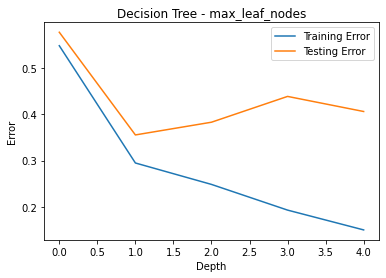

In [23]:
draw_validation_curve(DecisionTreeClassifier(),X_train, y_train,'max_leaf_nodes',5,13)

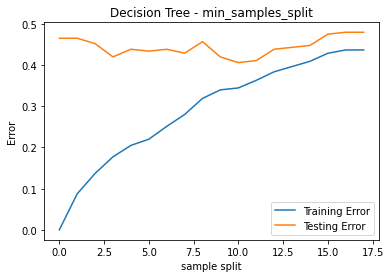

In [32]:
draw_validation_curve(DecisionTreeClassifier(),X_train, y_train,'min_samples_split',5,13)

<function confusion_matrix at 0x7fe0a83d5ee0>


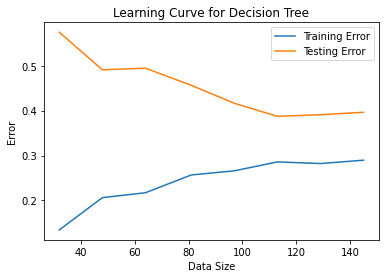

In [26]:
draw_learning_curve()

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[ 1  2  1  0  0]
 [ 0 11  4  2  0]
 [ 0  0 10  4  0]
 [ 0  0  5  4  2]
 [ 0  0  0  0  2]]
              precision    recall  f1-score   support

           3       1.00      0.25      0.40         4
           4       0.85      0.65      0.73        17
           5       0.50      0.71      0.59        14
           6       0.40      0.36      0.38        11
           7       0.50      1.00      0.67         2

    accuracy                           0.58        48
   macro avg       0.65      0.59      0.55        48
weighted avg       0.64      0.58      0.58        48



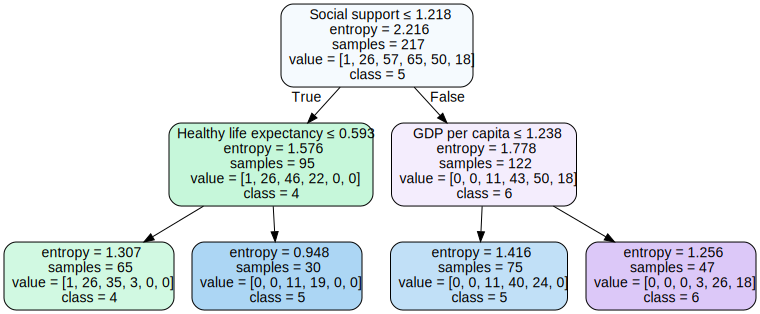

In [30]:
# visualization of decision tree
clf =  DecisionTreeClassifier(random_state=3, criterion='entropy', max_depth=2)
clf = clf.fit(X_train, y_train)
features = list(X_train.columns.values)
dot_data = tree.export_graphviz(clf, out_file=None, 
                        feature_names=features,  
                        class_names=list(map(str, set(y))),  
                        filled=True, rounded=True,  
                        special_characters=True)
graph = graphviz.Source(dot_data)
graph

## Boosting

In [65]:
parameters = {\
'learning_rate':[0.25,0.5,0.75,1.0,1.5,2],\
'random_state':[1,2,3],\
'n_estimators':[10,20,30,40,50]}
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
dt = DecisionTreeClassifier(max_depth=20,min_samples_split=75)
alf = AdaBoostClassifier(base_estimator = dt)
start = time.time()
clf = GridSearchCV(alf, parameters, cv=cv,n_jobs=14)
clf.fit(X_train, y_train)
end = time.time()
total = end - start
print(total)

20.742499113082886


In [66]:
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=20,
                                                         min_samples_split=75),
                   learning_rate=0.75, random_state=3)
{'learning_rate': 0.75, 'n_estimators': 50, 'random_state': 3}
0.6018181818181818


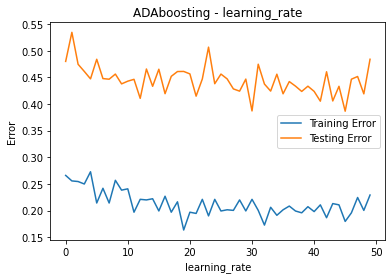

In [67]:
train_scores, valid_scores = validation_curve(AdaBoostClassifier(base_estimator = dt),\
                                              X_train, y_train,'learning_rate',\
                                              np.linspace(start=0.1,stop=2,num=50),cv=5,n_jobs=14)
draw_validation_curve('ADAboosting', 'learning_rate', train_scores, valid_scores)

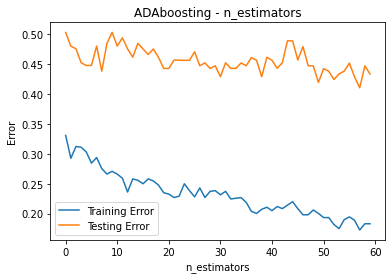

In [68]:
train_scores, valid_scores = validation_curve(AdaBoostClassifier(base_estimator = dt), \
                                              X_train, y_train,'n_estimators',\
                                              np.arange(start=10,stop=70),cv=5,n_jobs=14)
draw_validation_curve('ADAboosting', 'n_estimators', train_scores, valid_scores)

<function confusion_matrix at 0x7fe0a83d5ee0>


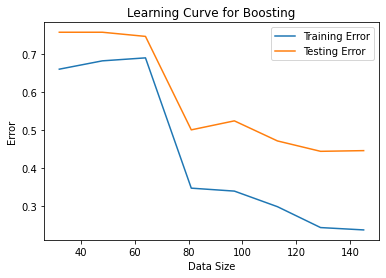

In [70]:
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
train_sizes, train_scores, test_scores =\
 learning_curve(AdaBoostClassifier(base_estimator = dt,learning_rate=.75,random_state=3,n_estimators=50),\
 X_train, y_train, cv=cv, n_jobs=14,\
  train_sizes=[.2,.3,.4,.5,.6,.7,.8,.9])
draw_learning_curve('Boosting', train_sizes, train_scores, test_scores)

## KNN

In [33]:
parameters = {'algorithm':('auto','ball_tree','kd_tree','brute'),'n_neighbors':[1,3,5,7,10,15,20],\
              'leaf_size':[4,6,8,10,12,14]}
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
dt = KNeighborsClassifier()
start = time.time()
print(start)
clf = GridSearchCV(dt, parameters, cv=5,n_jobs=13)
clf.fit(X_train, y_train)
end=time.time()
print(end)

1613893391.642257
1613893394.368522


In [34]:
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

KNeighborsClassifier(leaf_size=4, n_neighbors=1)
{'algorithm': 'auto', 'leaf_size': 4, 'n_neighbors': 1}
0.6638477801268499


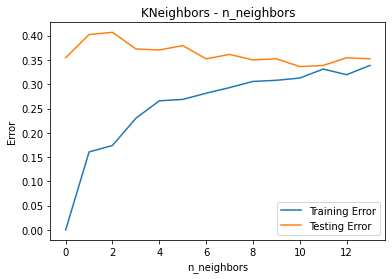

In [36]:
draw_validation_curve('KNeighbors', KNeighborsClassifier(),X_train, y_train,'n_neighbors', cv ,13)

<function confusion_matrix at 0x7fe0a83d5ee0>


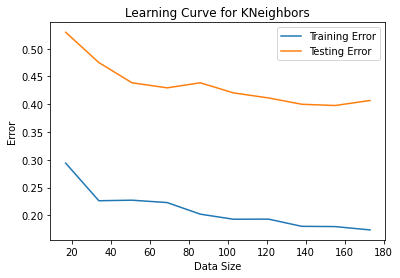

In [38]:
train_sizes, train_scores, test_scores =\
 learning_curve(KNeighborsClassifier(algorithm='auto',n_neighbors=3,leaf_size=4),\
                X_train, y_train, cv=cv, n_jobs=13,\
  train_sizes=[.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
draw_learning_curve('KNeighbors' , train_sizes, train_scores, test_scores)

## SVM

In [43]:
#scaler = MinMaxScaler()
#X = scaler.fit_transform(dataTraining)
X = preprocessing.scale(X_train)
parameters = {'kernel':('rbf','linear'),\
'C':[0.0001,0.001,0.01,0.1,1.0,1.01,1.001,1.0001],\
#'tol':[0.3,.4,.5,.6,.7,.8,.9],\
'gamma':np.logspace(start=-1, stop=2, num=15)}
# cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
svm_i = svm.SVC(cache_size=500)
start = time.time()
clf = GridSearchCV(svm_i, parameters, cv=5,n_jobs=10)
clf.fit(X, y_train)
end = time.time()
total = end - start
print(total)

1.9051809310913086


In [44]:
# logging.debug(f'SVM Grid Search Execution Time: {total}')
# logging.debug("-------------Best Estimator SVM-------------")
print(clf.best_estimator_)
# logging.debug("-------------Best Params SVM-------------")
print(clf.best_params_)
# logging.debug("-------------Best Score SVM-------------")
print(clf.best_score_)

SVC(cache_size=500, gamma=0.16378937069540642)
{'C': 1.0, 'gamma': 0.16378937069540642, 'kernel': 'rbf'}
0.6408033826638478


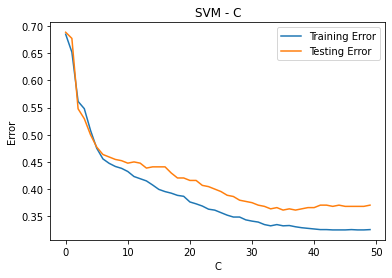

In [50]:
train_scores, valid_scores = validation_curve(svm.SVC(cache_size=15000), X_train, y_train,'C',\
                                              np.linspace(start=.0001,stop=2),cv=cv, n_jobs=14)
draw_validation_curve('SVM', 'C', train_scores, valid_scores)

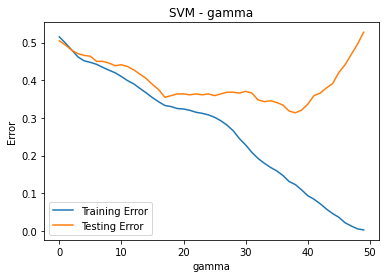

In [51]:
train_scores, valid_scores = validation_curve(svm.SVC(cache_size=15000), \
                                              X_train, y_train,'gamma',\
                                              np.logspace(start=-1, stop=2),cv=cv, n_jobs=14)
draw_validation_curve('SVM', 'gamma', train_scores, valid_scores)

<function confusion_matrix at 0x7fe0a83d5ee0>


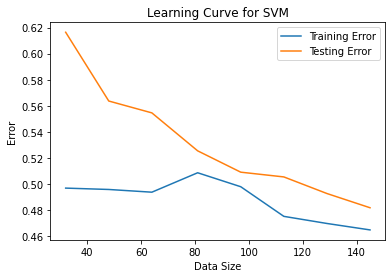

In [52]:
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
train_sizes, train_scores, test_scores =\
 learning_curve(svm.SVC(cache_size=500,C=1.00,kernel='rbf',tol=0.5,gamma=0.16378937069540642),\
 X_train, y_train, cv=cv, n_jobs=14,\
  train_sizes=[.2,.3,.4,.5,.6,.7,.8,.9])
draw_learning_curve('SVM', train_sizes, train_scores, test_scores)

## Neural Networks

In [54]:
parameters = {'activation':('identity','logistic','tanh','relu'),\
'alpha':[0.0001,0.001,0.01],\
'learning_rate':('constant','invscaling','adaptive'),\
'learning_rate_init':[0.0001,0.001,0.01,.1],\
'hidden_layer_sizes':[(2,), (4,), (6,)]}
cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
mlp = MLPClassifier(max_iter=1000)
start = time.time()
clf = GridSearchCV(mlp, parameters, cv=5,n_jobs=14)
clf.fit(X_train, y_train)
end = time.time()
total = end - start

In [55]:
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

MLPClassifier(activation='tanh', hidden_layer_sizes=(4,),
              learning_rate_init=0.01, max_iter=1000)
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (4,), 'learning_rate': 'constant', 'learning_rate_init': 0.01}
0.6455602536997886


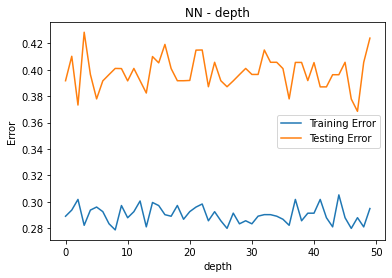

In [57]:
train_scores, valid_scores = validation_curve(MLPClassifier(max_iter=1000), X_train, y_train,'alpha',\
                                              np.linspace(start=0.000001,stop=0.00001),cv=5,n_jobs=14)
draw_validation_curve('NN', 'depth', train_scores, valid_scores)

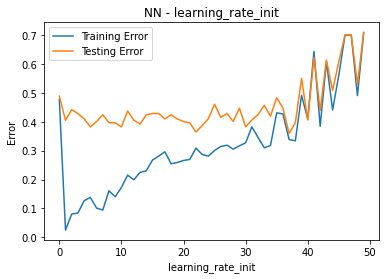

In [59]:
train_scores, valid_scores = validation_curve(MLPClassifier(max_iter=2000), X_train, y_train,'learning_rate_init',\
                                              np.linspace(start=0.0001,stop=0.4),cv=5,n_jobs=14)

draw_validation_curve('NN', 'learning_rate_init', train_scores, valid_scores)

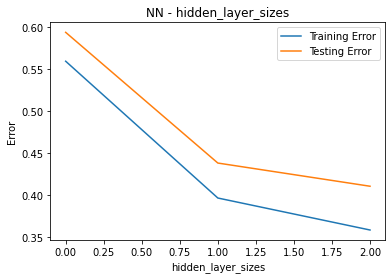

In [60]:
train_scores, valid_scores = validation_curve(MLPClassifier(max_iter=2000), \
                                              X_train, y_train,'hidden_layer_sizes',\
                                              [(2,), (5,), (10,)],cv=5,n_jobs=13)
draw_validation_curve('NN', 'hidden_layer_sizes', train_scores, valid_scores)

<function confusion_matrix at 0x7fe0a83d5ee0>


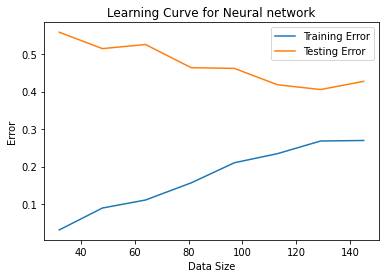

In [62]:
train_sizes, train_scores, test_scores =\
 learning_curve(MLPClassifier(activation='tanh',alpha=0.0001,max_iter=2000,\
                              learning_rate='constant',learning_rate_init=0.01,hidden_layer_sizes=(4,)),\
 X_train, y_train, cv=cv, n_jobs=14,\
  train_sizes=[.2,.3,.4,.5,.6,.7,.8,.9])
draw_learning_curve('Neural network', train_sizes, train_scores, test_scores)